In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0,50,501)

In [3]:
y = np.sin(x)

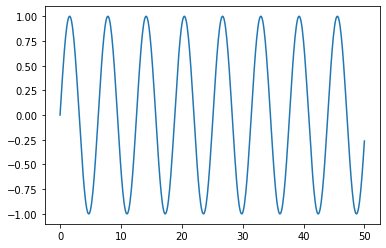

In [4]:
plt.plot(x,y);

In [5]:
df = pd.DataFrame(data=y, index=x, columns=['Sine'])

In [6]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [7]:
test_percent = 0.1

In [8]:
len(df)*test_percent

50.1

In [9]:
test_point = np.round(len(df)*test_percent)

In [10]:
test_index = int(len(df) - test_point)

In [11]:
test_index

451

In [12]:
train = df.iloc[:test_index]

In [13]:
test = df.iloc[test_index:]

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [17]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

### Batch Generator

In [18]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [19]:
length = 2
batch_size = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [20]:
len(scaled_train)

451

In [21]:
len(generator)

449

In [22]:
X,y = generator[0]

In [23]:
X #length=2

array([[[0.49999912],
        [0.54991622]]])

In [24]:
y

array([[0.59933458]])

In [25]:
scaled_train[:3]

array([[0.49999912],
       [0.54991622],
       [0.59933458]])

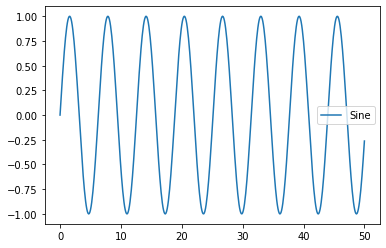

In [26]:
 df.plot();

In [27]:
length = 50
batch_size = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [28]:
len(generator)

401

In [29]:
X,y = generator[0]

In [30]:
X

array([[[4.99999116e-01],
        [5.49916225e-01],
        [5.99334579e-01],
        [6.47760405e-01],
        [6.94709850e-01],
        [7.39713809e-01],
        [7.82322618e-01],
        [8.22110545e-01],
        [8.58680040e-01],
        [8.91665714e-01],
        [9.20737985e-01],
        [9.45606372e-01],
        [9.66022399e-01],
        [9.81782075e-01],
        [9.92727935e-01],
        [9.98750612e-01],
        [9.99789928e-01],
        [9.95835500e-01],
        [9.86926839e-01],
        [9.73152957e-01],
        [9.54651478e-01],
        [9.31607263e-01],
        [9.04250562e-01],
        [8.72854714e-01],
        [8.37733417e-01],
        [7.99237589e-01],
        [7.57751870e-01],
        [7.13690771e-01],
        [6.67494535e-01],
        [6.19624741e-01],
        [5.70559686e-01],
        [5.20789614e-01],
        [4.70811810e-01],
        [4.21125636e-01],
        [3.72227539e-01],
        [3.24606094e-01],
        [2.78737119e-01],
        [2.35078919e-01],
        [1.9

In [31]:
y

array([[0.02053313]])

### Creating Model

In [32]:
from tensorflow.keras.models import Sequential

In [33]:
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [34]:
n_features = 1 #no of features predicting y

In [35]:
model = Sequential()

model.add(SimpleRNN(50, input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit_generator(generator, epochs=5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


401/401 [==============================] - 4s 8ms/step - loss: 0.0098
Epoch 2/5
401/401 [==============================] - 3s 8ms/step - loss: 1.6399e-04
Epoch 3/5
401/401 [==============================] - 3s 8ms/step - loss: 1.2245e-04
Epoch 4/5
401/401 [==============================] - 3s 8ms/step - loss: 1.2393e-04
Epoch 5/5
401/401 [==============================] - 3s 8ms/step - loss: 2.6513e-05


In [38]:
losses = pd.DataFrame(model.history.history)

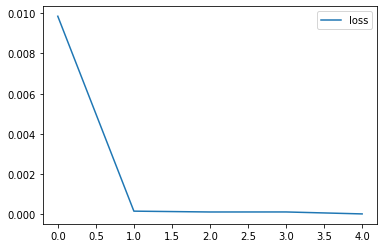

In [39]:
losses.plot()

In [40]:
first_eval_batch = scaled_train[-length:]

In [41]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [42]:
model.predict(first_eval_batch)

array([[0.9572039]], dtype=float32)

In [43]:
scaled_test[0]

array([0.94955134])

In [44]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [45]:
for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  
  test_predictions.append(current_pred)
  
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

In [46]:
test_predictions

[array([0.9572039], dtype=float32),
 array([0.97699094], dtype=float32),
 array([0.9945144], dtype=float32),
 array([1.0043489], dtype=float32),
 array([1.0116998], dtype=float32),
 array([1.0129669], dtype=float32),
 array([1.0091949], dtype=float32),
 array([1.0010282], dtype=float32),
 array([0.98786426], dtype=float32),
 array([0.97143734], dtype=float32),
 array([0.9464884], dtype=float32),
 array([0.9205721], dtype=float32),
 array([0.88822], dtype=float32),
 array([0.85620975], dtype=float32),
 array([0.8183527], dtype=float32),
 array([0.77794075], dtype=float32),
 array([0.73603684], dtype=float32),
 array([0.69071215], dtype=float32),
 array([0.64639837], dtype=float32),
 array([0.5968562], dtype=float32),
 array([0.5506471], dtype=float32),
 array([0.49962026], dtype=float32),
 array([0.45291716], dtype=float32),
 array([0.4024599], dtype=float32),
 array([0.35523888], dtype=float32),
 array([0.30947155], dtype=float32),
 array([0.26425794], dtype=float32),
 array([0.2245409

In [47]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [48]:
true_predictions = scaler.inverse_transform(test_predictions)

In [49]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
test

,Sine,Predictions
45.1,0.899097,0.914402
45.2,0.938307,0.953976
45.3,0.968142,0.989023
45.4,0.988304,1.008691
45.5,0.998591,1.023393
45.6,0.998900,1.025927
45.7,0.989229,1.018383
45.8,0.969673,1.002050
45.9,0.940429,0.975722
46.0,0.901788,0.942869


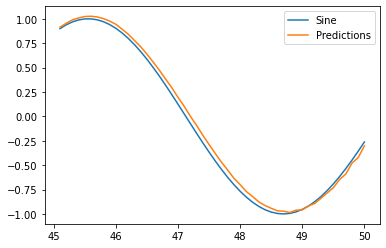

In [51]:
test.plot()

### Early Stopping

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [54]:
length = 49

generator  = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

In [55]:
model = Sequential()

model.add(LSTM(50, input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [56]:
model.fit_generator(generator, epochs=20, validation_data=validation_generator, callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
402/402 [==============================] - 10s 20ms/step - loss: 0.0243 - val_loss: 8.2789e-05
Epoch 2/20
402/402 [==============================] - 8s 19ms/step - loss: 2.2862e-04 - val_loss: 9.7282e-05
Epoch 3/20
402/402 [==============================] - 8s 19ms/step - loss: 1.2228e-04 - val_loss: 9.1804e-05


In [57]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  
  test_predictions.append(current_pred)
  
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


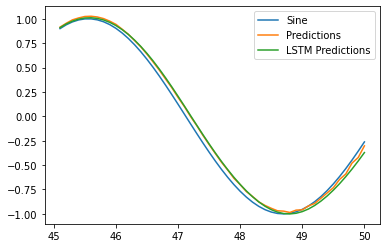

In [58]:
true_predictions = scaler.inverse_transform(test_predictions)

test['LSTM Predictions'] = true_predictions

test.plot()

### Forecasting

In [59]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [60]:
generator  = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [61]:
model = Sequential()

model.add(LSTM(50, input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [62]:
model.fit_generator(generator, epochs=6)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/6
452/452 [==============================] - 11s 20ms/step - loss: 0.0152
Epoch 2/6
452/452 [==============================] - 9s 19ms/step - loss: 1.8243e-04
Epoch 3/6
452/452 [==============================] - 9s 19ms/step - loss: 1.4964e-04
Epoch 4/6
452/452 [==============================] - 9s 19ms/step - loss: 3.2877e-04
Epoch 5/6
452/452 [==============================] - 9s 20ms/step - loss: 3.3875e-04
Epoch 6/6
452/452 [==============================] - 9s 20ms/step - loss: 1.0493e-04


In [63]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(25):
  current_pred = model.predict(current_batch)[0]
  
  forecast.append(current_pred)
  
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

In [64]:
forecast = scaler.inverse_transform(forecast)

In [65]:
forecast_index = np.arange(50.1,52.6,step=0.1)

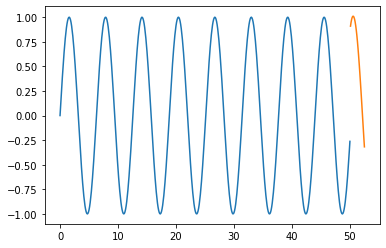

In [66]:
plt.plot(df.index, df['Sine'])
plt.plot(forecast_index, forecast)